In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




## Exploratory Data Analysis

In [3]:
#1. Understanding the data
data = pd.read_csv('dataset.csv')
data.head()

,Address,AreaName,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price
0,"86 Waterford Dr Toronto, ON",Richview,3,1.00,1180,5650,1.0,"$221,900.00"
1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,3,2.25,2570,7242,2.0,"$538,000.00"
2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,2,1.00,770,10000,1.0,"$180,000.00"
3,"102 NEIL Avenue Hamilton, ON",Greenford,4,3.00,1960,5000,1.0,"$604,000.00"
4,"#1409 - 230 King St Toronto, ON",Downtown,3,2.00,1680,8080,1.0,"$510,000.00"


In [4]:
import pandas as pd
# price into float
data[' price '] = data[' price '].apply(lambda x: float(x.replace('$', '').replace(',', '').strip()))



In [27]:

data.tail()

,Address,AreaName,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price
21608,NaN,NaN,3,2.50,1530,1131,3.0,360000.0
21609,NaN,NaN,4,2.50,2310,5813,2.0,400000.0
21610,NaN,NaN,2,0.75,1020,1350,2.0,402101.0
21611,NaN,NaN,3,2.50,1600,2388,2.0,400000.0
21612,NaN,NaN,2,0.75,1020,1076,2.0,325000.0


In [28]:
data.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,2.161300e+04
mean,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,5.400881e+05
std,0.930062,0.770163,918.440897,4.142051e+04,0.539989,3.671272e+05
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,7.500000e+04
25%,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,3.219500e+05
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,4.500000e+05
75%,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,6.450000e+05
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,7.700000e+06


In [29]:
data.shape

(21613, 8)

In [30]:
data.nunique()

Address        2889
AreaName        448
bedrooms         13
bathrooms        30
sqft_living    1038
sqft_lot       9782
floors            6
 price         4028
dtype: int64

In [31]:
data.isnull().sum()

Address        18653
AreaName       18669
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
 price             0
dtype: int64

## Data Visualization

<AxesSubplot:>

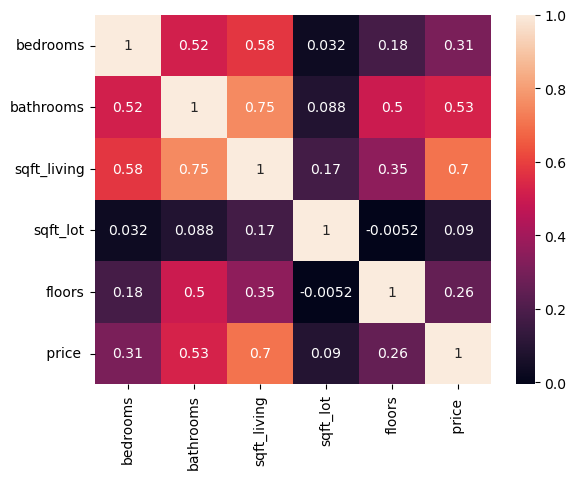

In [32]:
#2. relationship analysis
corelation=data.corr()
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

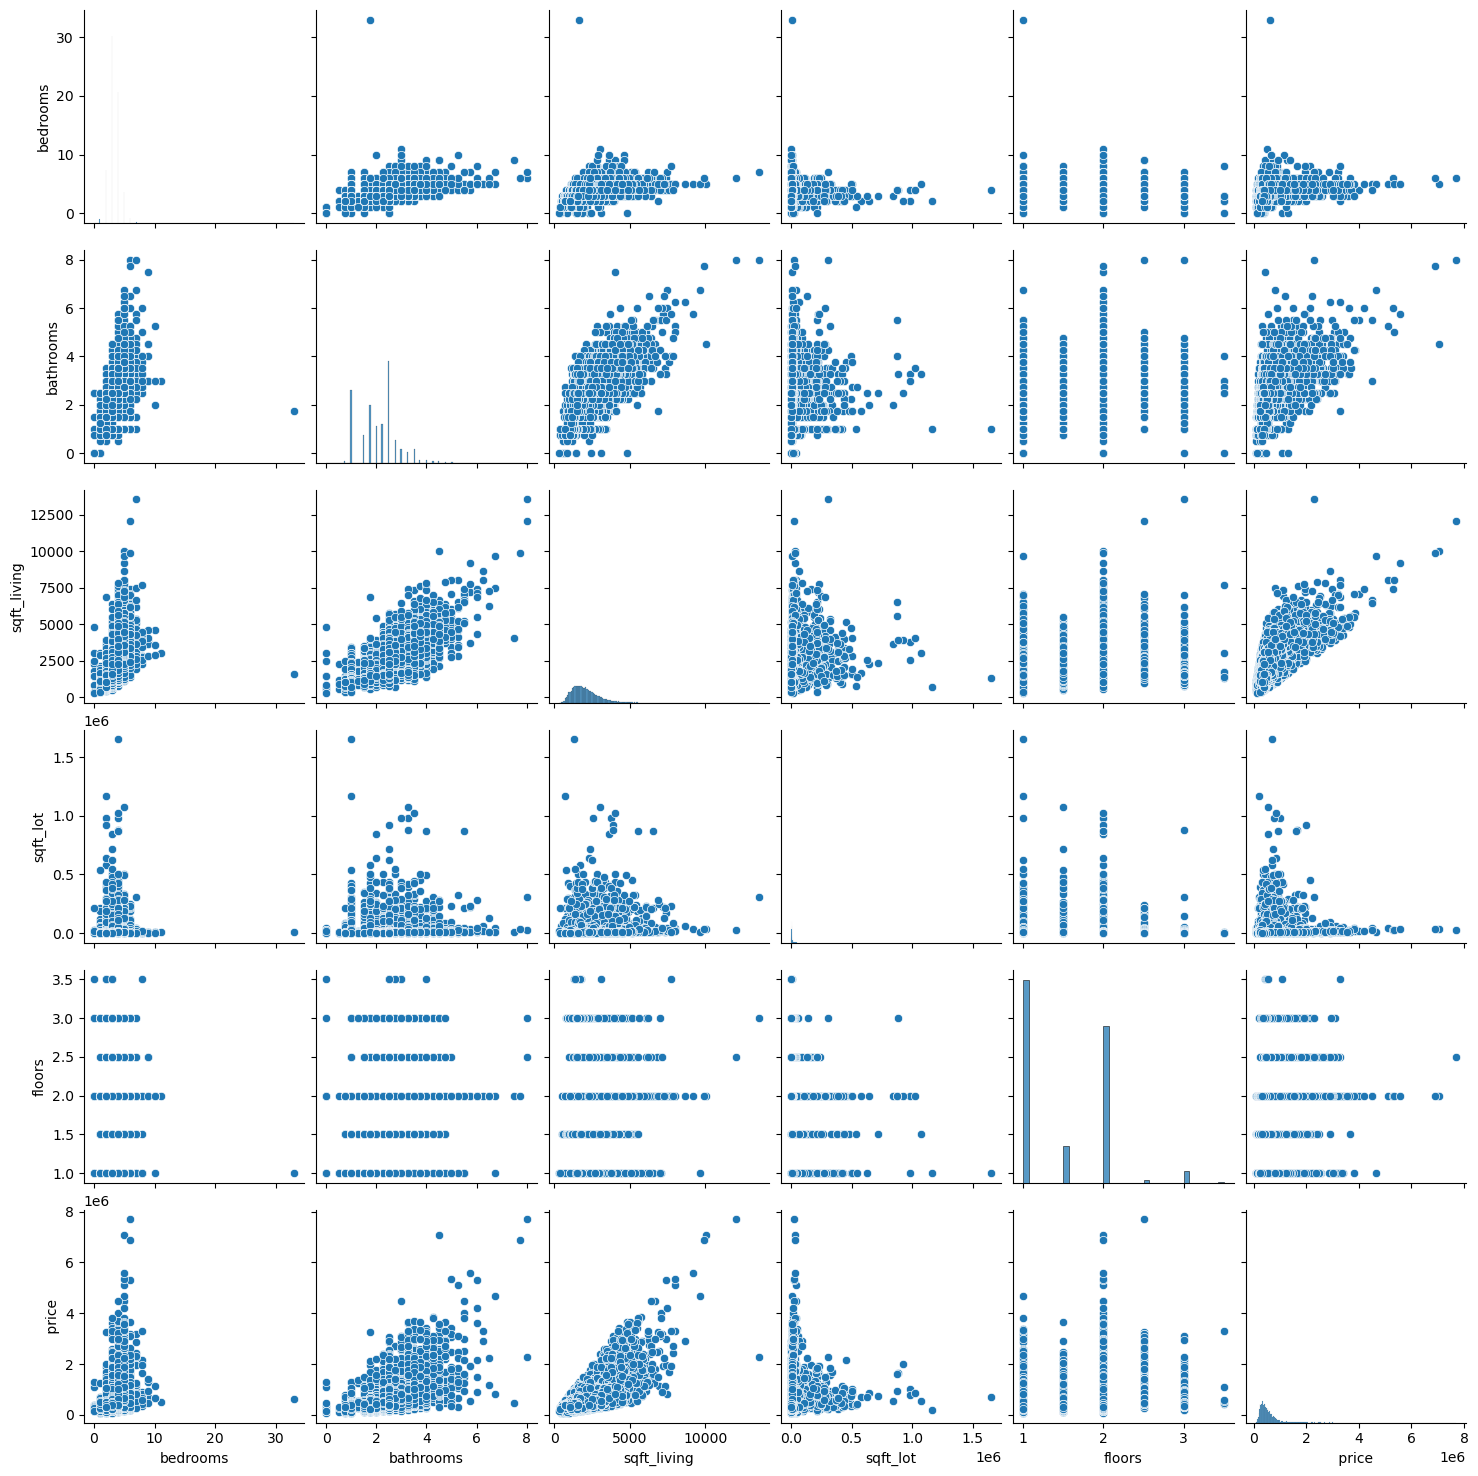

In [33]:
sns.pairplot(data)

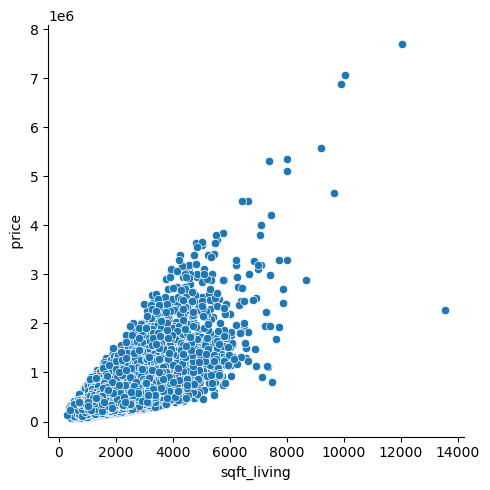

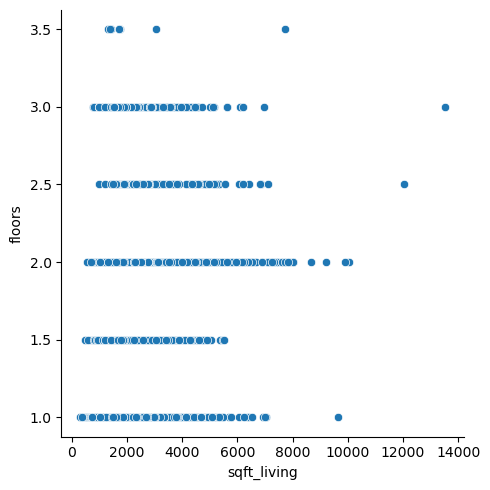

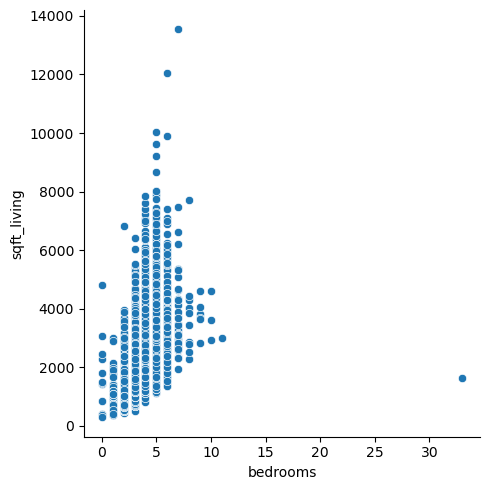

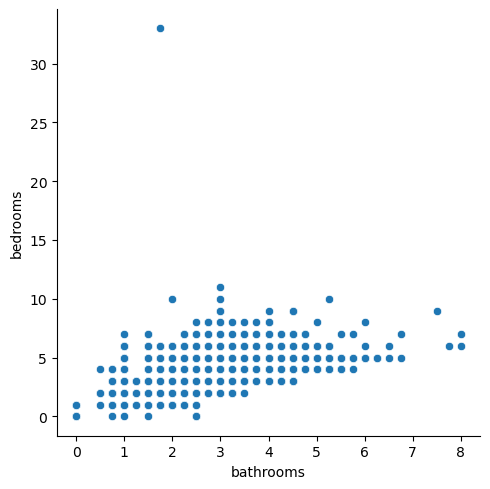

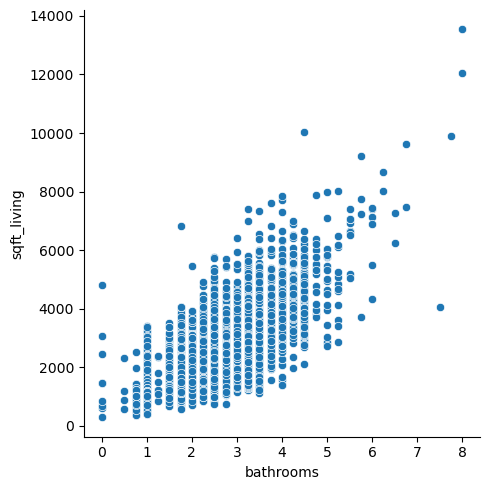

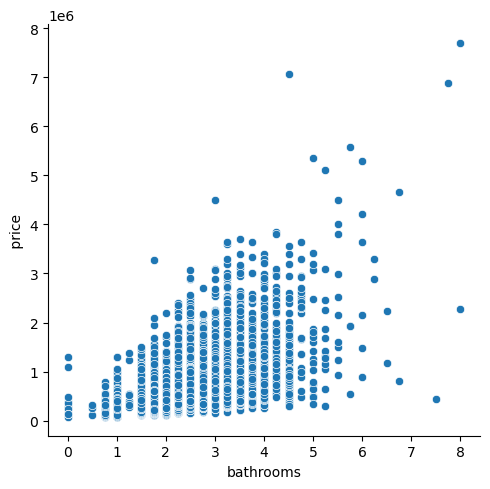

In [62]:
sns.relplot(x='sqft_living', y=' price ', data=data)
sns.relplot(x='sqft_living', y='floors', data=data)
sns.relplot(x='bedrooms', y='sqft_living', data=data)
sns.relplot(x='bathrooms', y='bedrooms', data=data)
sns.relplot(x='bathrooms', y='sqft_living', data=data)
sns.relplot(x='bathrooms', y=' price ', data=data)

## Observation

1. Price of the House increases with area of living
2. With more bedrooms the area of living is more
3. Houses with 3 or more bathrooms dont come with less than 3 bedrooms
4. More bathrooms means more area of living
5. More bathrooms indicates more area of living and also more price

## Regression Model



In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# Drop rows with missing values
data.dropna(subset=['Address', 'AreaName'], inplace=True)

# Define the dependent and independent variables
X = data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']]
y = data[' price ']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model on the testing data
score = model.score(X_test, y_test)
print("R-squared score:", score)

# Make a prediction using the model
new_data = [[2, 1, 1050, 403365, 1]]
prediction = model.predict(new_data)
print("Prediction:", prediction)


R-squared score: 0.5172250124966329
Prediction: [257542.27298025]


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
